# Elementary CA

## Initial implementation

Implemented using pure Python, strings and dicts.


In [8]:
# %load ca.py
from PIL import Image

# first implementation w/ string dict

def make_rule(rule_number, neighborhood_size):
    outputs = [int(n) for n in format(rule_number, "08b")]
    int_inputs = list(range(2**neighborhood_size))
    inputs = [format(y, "03b") for y in int_inputs]
    inputs = list(reversed(inputs))  # wolfram style
    rule = {inputs[i]:outputs[i] for i in range(2**neighborhood_size)}
    # print(rule)
    return rule

def apply_rule(rule, values):
    v = "".join(str(x) for x in values)
    return rule[v]

def make_generation(rule, previous_gen, neighborhood_size):
    gen = []
    neighborhood = list(range(-(neighborhood_size//2), neighborhood_size//2 + 1))
    # print(neighborhood)
    for i in range(len(previous_gen)):
        neighbors = [(i + x)%len(previous_gen) for x in neighborhood]
        values = [previous_gen[x] for x in neighbors]
        output = apply_rule(rule, values)
        gen.append(output)
    # print(gen)
    return gen

def render_ca(generations):
    w,h = len(generations[0]), len(generations)
    img = Image.new("RGB", (w,h), (255,255,255))
    pixels = img.load()
    for i in range(len(generations)):
        for j in range(len(generations[0])):
            if generations[i][j] == 1:
                pixels[j,i] = (0,0,0)
#     img.show()
    from IPython.display import display # to display images
    display(img)

def run_ca(rule_number, inpt, steps, neighborhood_size):
    rule = make_rule(rule_number, neighborhood_size)
    generations = [inpt]
    for i in range(steps):
        current = generations[-1]
        generations.append(make_generation(rule, current, neighborhood_size))
    return generations


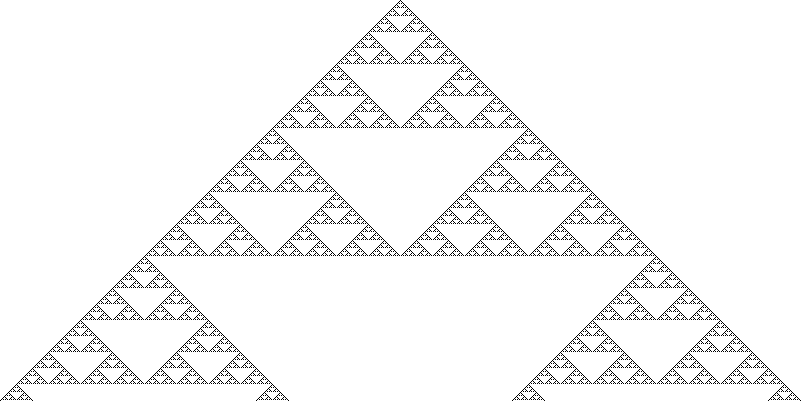

In [9]:
steps = 400
inpt = 400*[0] + [1] + 400*[0]
neighborhood_size = 3
rule_number = 90
g = run_ca(rule_number, inpt, steps, neighborhood_size)
render_ca(g)

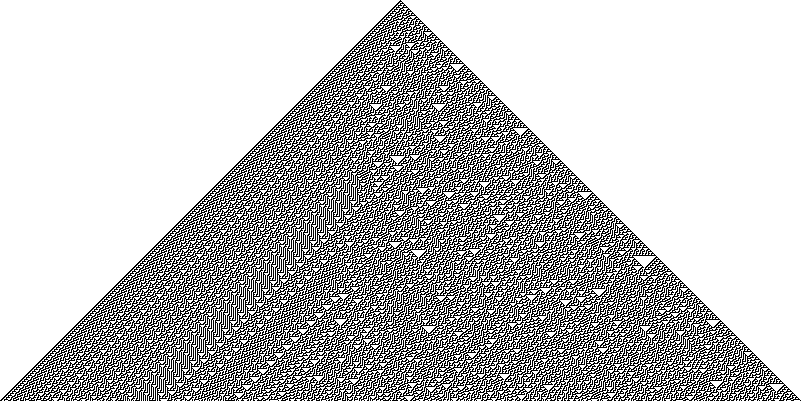

In [11]:
rule_number = 30
g = run_ca(rule_number, inpt, steps, neighborhood_size)
render_ca(g)

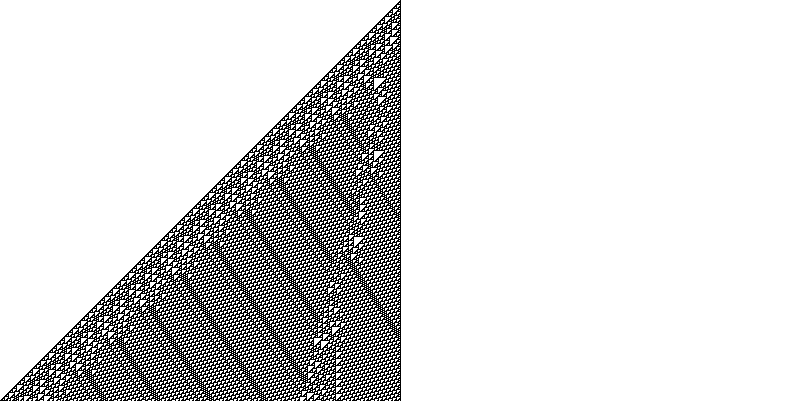

In [12]:
rule_number = 110
g = run_ca(rule_number, inpt, steps, neighborhood_size)
render_ca(g)

## Execution time

In [21]:
%timeit run_ca(rule_number, inpt, steps)

652 ms ± 14.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Numba implementation (to-do)

Numba-compatible data structures will be needed.